<a href="https://colab.research.google.com/github/19mca/Cognifyz-Tasks-/blob/main/Predict_Restaurant_Ratings-Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



In [3]:
df = pd.read_csv('/content/drive/MyDrive/Cognify/Dataset .csv')
df.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [ ]:
# Check for missing values and drop rows with any missing values
print("\nMissing values before dropping:\n", df.isnull().sum())
df.dropna(inplace=True)
print("\nMissing values after dropping:\n", df.isnull().sum())


Missing values before dropping:
 Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

Missing values after dropping:
 Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is deliver

In [ ]:
# Drop columns that are not relevant for prediction
columns_to_drop = ['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines', 'Currency']
df.drop(columns=columns_to_drop, axis=1, inplace=True)
print("\nDataset after dropping irrelevant columns:\n", df.head())



Dataset after dropping irrelevant columns:
    Average Cost for two Has Table booking Has Online delivery  \
0                  1100               Yes                  No   
1                  1200               Yes                  No   
2                  4000               Yes                  No   
3                  1500                No                  No   
4                  1500               Yes                  No   

  Is delivering now Switch to order menu  Price range  Aggregate rating  \
0                No                   No            3               4.8   
1                No                   No            3               4.5   
2                No                   No            4               4.4   
3                No                   No            4               4.9   
4                No                   No            4               4.8   

  Rating color Rating text  Votes  
0   Dark Green   Excellent    314  
1   Dark Green   Excellent    591  
2    

In [ ]:

# Encode categorical variables using LabelEncoder
categorical_columns = ['Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Rating color', 'Rating text']
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
print("\nDataset after encoding categorical variables:\n", df.head())



Dataset after encoding categorical variables:
    Average Cost for two  Has Table booking  Has Online delivery  \
0                  1100                  1                    0   
1                  1200                  1                    0   
2                  4000                  1                    0   
3                  1500                  0                    0   
4                  1500                  1                    0   

   Is delivering now  Switch to order menu  Price range  Aggregate rating  \
0                  0                     0            3               4.8   
1                  0                     0            3               4.5   
2                  0                     0            4               4.4   
3                  0                     0            4               4.9   
4                  0                     0            4               4.8   

   Rating color  Rating text  Votes  
0             0            1    314  
1         

In [ ]:

# Split the data into features and target variable
X = df.drop('Aggregate rating', axis=1)
y = df['Aggregate rating']
print("\nFeatures (X) preview:\n", X.head())
print("\nTarget (y) preview:\n", y.head())



Features (X) preview:
    Average Cost for two  Has Table booking  Has Online delivery  \
0                  1100                  1                    0   
1                  1200                  1                    0   
2                  4000                  1                    0   
3                  1500                  0                    0   
4                  1500                  1                    0   

   Is delivering now  Switch to order menu  Price range  Rating color  \
0                  0                     0            3             0   
1                  0                     0            3             0   
2                  0                     0            4             1   
3                  0                     0            4             0   
4                  0                     0            4             0   

   Rating text  Votes  
0            1    314  
1            1    591  
2            5    270  
3            1    365  
4            1

In [ ]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=250)
print("\nTraining features (X_train) shape:", X_train.shape)
print("Testing features (X_test) shape:", X_test.shape)
print("Training target (y_train) shape:", y_train.shape)
print("Testing target (y_test) shape:", y_test.shape)



Training features (X_train) shape: (7633, 9)
Testing features (X_test) shape: (1909, 9)
Training target (y_train) shape: (7633,)
Testing target (y_test) shape: (1909,)


In [ ]:

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_prediction = lr.predict(X_test)

# Evaluate Linear Regression model
lr_mae = mean_absolute_error(y_test, lr_prediction)
lr_mse = mean_squared_error(y_test, lr_prediction)
lr_r2 = r2_score(y_test, lr_prediction)
print("\nLinear Regression Model:")
print(f"Mean Absolute Error: {lr_mae:.2f}")
print(f"Mean Squared Error: {lr_mse:.2f}")
print(f"R2 Score: {lr_r2:.2f}")



Linear Regression Model:
Mean Absolute Error: 1.00
Mean Squared Error: 1.42
R2 Score: 0.39


In [ ]:

# Train a Decision Tree Regressor model
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
dt_prediction = dt.predict(X_test)

# Evaluate Decision Tree Regressor model
dt_mae = mean_absolute_error(y_test, dt_prediction)
dt_mse = mean_squared_error(y_test, dt_prediction)
dt_r2 = r2_score(y_test, dt_prediction)
print("\nDecision Tree Regressor Model:")
print(f"Mean Absolute Error: {dt_mae:.2f}")
print(f"Mean Squared Error: {dt_mse:.2f}")
print(f"R2 Score: {dt_r2:.2f}")



Decision Tree Regressor Model:
Mean Absolute Error: 0.15
Mean Squared Error: 0.05
R2 Score: 0.98


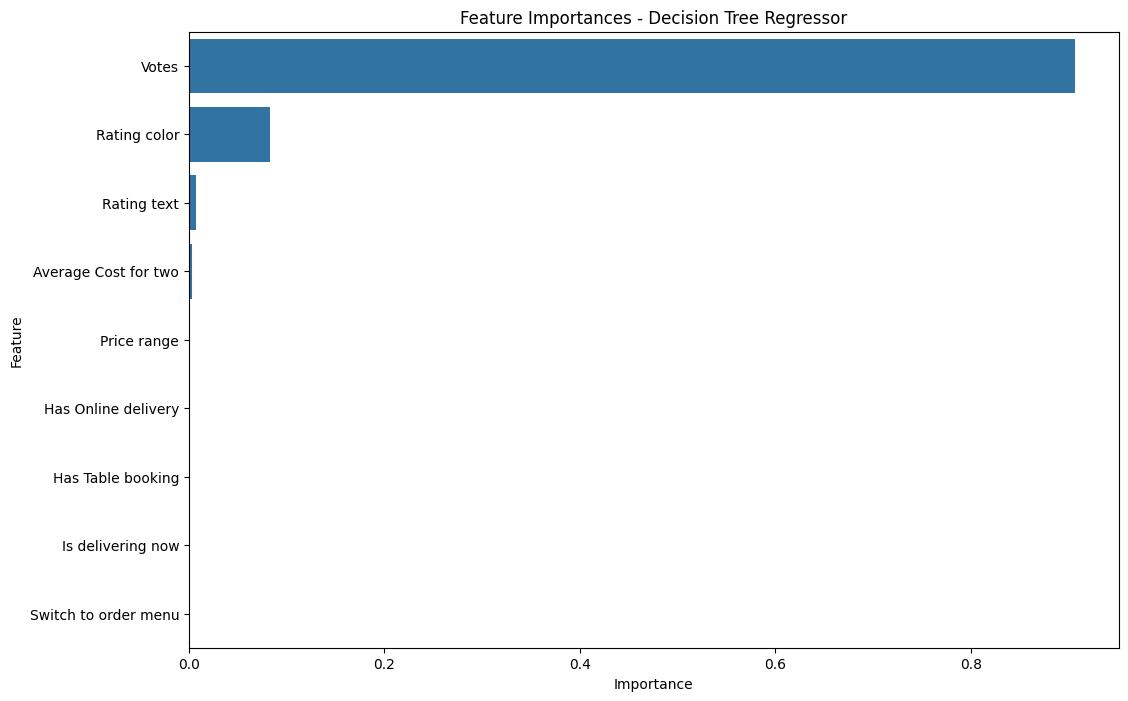

In [ ]:

# Visualize feature importance from Decision Tree model
importances = dt.feature_importances_
feature_names = X.columns
features_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
features_importance_df = features_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=features_importance_df)
plt.title('Feature Importances - Decision Tree Regressor')
plt.show()


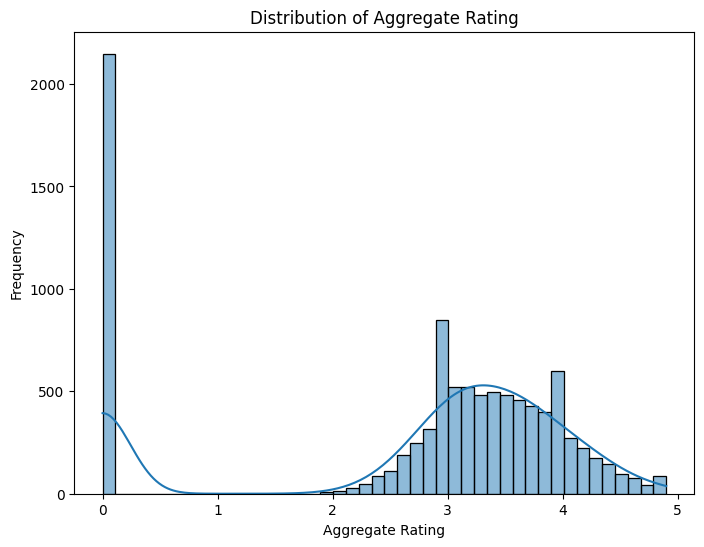

In [ ]:

# Distribution of the target variable ("Aggregate rating")
plt.figure(figsize=(8, 6))
sns.histplot(y, kde=True)
plt.title("Distribution of Aggregate Rating")
plt.xlabel("Aggregate Rating")
plt.ylabel("Frequency")
plt.show()


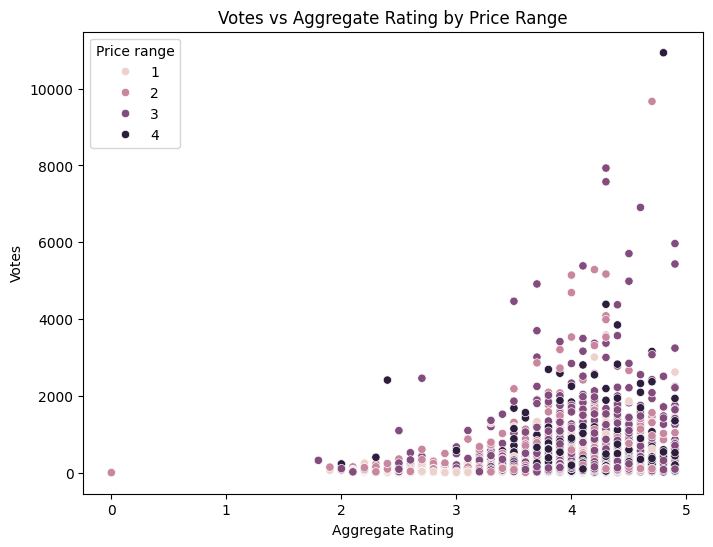

In [ ]:

# Scatter plot of Votes vs Aggregate Rating colored by Price Range
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Aggregate rating'], y=df['Votes'], hue=df['Price range'])
plt.title("Votes vs Aggregate Rating by Price Range")
plt.xlabel("Aggregate Rating")
plt.ylabel("Votes")
plt.show()



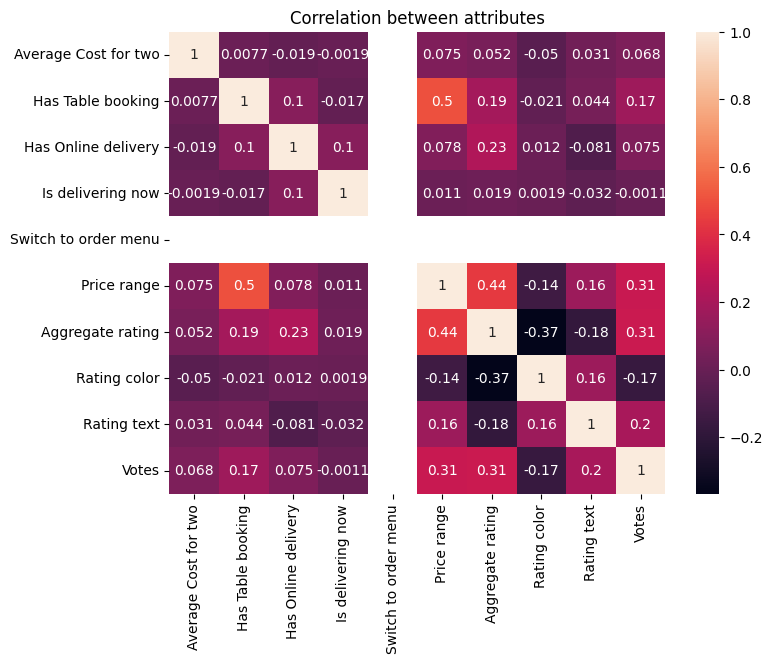

In [ ]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True)
plt.title("Correlation between attributes")
plt.show()